In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement AdaBoost
import sklearn
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

%matplotlib inline

In [2]:
ufc_df = pd.read_csv('ALL_weightclasses.csv')
ufc_df.head()

,Unnamed: 0,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,-150.0,130,66.666667,130.000000,0,False,6,5,0,...,-0.53,0.6,-0.37,0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,1,170.0,-200,170.000000,50.000000,1,False,4,3,2,...,2.19,0.3,-1.48,2,450.0,350.0,700.0,1100.0,550.0,120.0
2,2,110.0,-130,110.000000,76.923077,1,False,5,3,1,...,-0.85,-1.6,-3.33,2,550.0,275.0,275.0,1400.0,600.0,185.0
3,3,-675.0,475,14.814815,475.000000,0,False,3,3,1,...,0.25,0.0,-1.57,2,175.0,900.0,500.0,3500.0,110.0,1100.0
4,4,-135.0,115,74.074074,115.000000,1,False,3,3,0,...,2.58,-0.6,-0.31,2,165.0,200.0,400.0,1200.0,900.0,600.0


In [3]:
#GET RID OF UNAMED COLUMN
ufc_df = ufc_df.drop(['Unnamed: 0'], axis = 1)
ufc_df

,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,...,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,-150.0,130,66.666667,130.000000,0,False,6,5,0,1,...,-0.530000,0.600000,-0.370000,0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,170.0,-200,170.000000,50.000000,1,False,4,3,2,0,...,2.190000,0.300000,-1.480000,2,450.0,350.0,700.0,1100.0,550.0,120.0
2,110.0,-130,110.000000,76.923077,1,False,5,3,1,0,...,-0.850000,-1.600000,-3.330000,2,550.0,275.0,275.0,1400.0,600.0,185.0
3,-675.0,475,14.814815,475.000000,0,False,3,3,1,0,...,0.250000,0.000000,-1.570000,2,175.0,900.0,500.0,3500.0,110.0,1100.0
4,-135.0,115,74.074074,115.000000,1,False,3,3,0,2,...,2.580000,-0.600000,-0.310000,2,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,130.0,-140,130.000000,71.428571,0,False,6,3,1,0,...,63.333333,1.833333,0.166667,2,378.0,411.0,600.0,1640.0,450.0,150.0
3090,150.0,-160,150.000000,62.500000,0,False,3,5,0,1,...,-20.733333,1.050000,0.650000,2,309.0,135.0,475.0,485.0,1330.0,632.0
3091,123.0,-133,123.000000,75.187970,1,False,4,3,0,3,...,9.150000,0.275000,0.950000,2,240.0,200.0,1275.0,1615.0,575.0,265.0
3092,-210.0,190,47.619048,190.000000,1,False,5,3,0,3,...,12.527778,-1.027778,-1.111111,2,325.0,665.0,105.0,940.0,1195.0,460.0


## Prepare the Data

In [4]:
# Selecting data correponding to Input Features X and Outcome y
X = ufc_df.drop(columns=['Winner'])
y = ufc_df['Winner']


# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

# (A) Implementing AdaBoost for Classification

## Hyperparameters of AdaBoost

In [5]:
# Define your model
classifier = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

# Start with an initial guess for parameters
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

pprint(random_grid)

{'learning_rate': [0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0,
                   1.1,
                   1.2000000000000002,
                   1.3000000000000003,
                   1.4000000000000001,
                   1.5000000000000002,
                   1.6,
                   1.7000000000000002,
                   1.8000000000000003,
                   1.9000000000000001,
                   2.0],
 'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500]}


In [6]:
# Creating stratified folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [7]:
# Call RandomizedSearchCV()
random_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

# Fit the model
start = time.time()            # Start Time
random_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training time: 337.2858216762543s


In [8]:
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)

Initial score:  0.6215471757184232
Initial parameters:  {'n_estimators': 280, 'learning_rate': 0.5}


In [9]:
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [400, 420, 440, 460, 480, 500],
              'learning_rate': [1.15, 1.20, 1.25]
}

pprint(param_grid)

{'learning_rate': [1.15, 1.2, 1.25],
 'n_estimators': [400, 420, 440, 460, 480, 500]}


In [10]:
# Call GridSearchCV()
grid_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 


# Fit the model
start = time.time()            # Start Time
grid_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training time: 110.54303669929504s


In [11]:
print('Improved score: ', grid_cv.best_score_)
print('Improved parameters: ', grid_cv.best_params_)

Improved score:  0.6046166750246105
Improved parameters:  {'learning_rate': 1.15, 'n_estimators': 420}


### Analyzing the performance of each stump in the ensemble

**Total Error of each stump**: Sum of weights associated with incorrectly classified instances

In [12]:
# Error of each stump
grid_cv.best_estimator_.estimator_errors_

array([0.38060046, 0.35967713, 0.47148112, 0.47687075, 0.46728576,
       0.46884706, 0.48329167, 0.46359189, 0.46919642, 0.47575984,
       0.49142963, 0.48909422, 0.4840014 , 0.47088213, 0.47709464,
       0.48723855, 0.4933978 , 0.48997396, 0.47601962, 0.48086488,
       0.48755693, 0.48686286, 0.48799282, 0.4859472 , 0.49020059,
       0.49245588, 0.49294631, 0.49477152, 0.49509498, 0.49518954,
       0.49130289, 0.49087659, 0.49476196, 0.49121555, 0.48725552,
       0.46814305, 0.46778261, 0.48071381, 0.49179756, 0.4940342 ,
       0.49444505, 0.49457602, 0.49466267, 0.49474092, 0.4948163 ,
       0.4936239 , 0.49356831, 0.49535589, 0.495663  , 0.49492893,
       0.4913534 , 0.49095359, 0.49445797, 0.49557104, 0.49577434,
       0.49583916, 0.49588236, 0.49508107, 0.49501988, 0.49175011,
       0.48820121, 0.48965408, 0.49334426, 0.49555673, 0.49592354,
       0.4951962 , 0.49514379, 0.49514936, 0.49520587, 0.49590572,
       0.48868011, 0.48810953, 0.47093806, 0.47231561, 0.46994

In [13]:
# Stump Weightage
grid_cv.best_estimator_.estimator_weights_

array([0.56005041, 0.66328062, 0.13132937, 0.10647053, 0.15070079,
       0.1434894 , 0.07688696, 0.16777425, 0.14187613, 0.11159223,
       0.03942757, 0.05017453, 0.07361867, 0.13409393, 0.10543846,
       0.05871544, 0.03037189, 0.04612596, 0.11039443, 0.08806455,
       0.05724993, 0.06044476, 0.05524367, 0.06465992, 0.04508305,
       0.03470559, 0.03244913, 0.02405188, 0.02256383, 0.02212882,
       0.04001076, 0.04197233, 0.02409586, 0.04041261, 0.05863732,
       0.14674075, 0.14840559, 0.08876051, 0.03773459, 0.02744399,
       0.02555384, 0.02495128, 0.02455266, 0.02419268, 0.02384586,
       0.02933165, 0.02958741, 0.02136353, 0.01995072, 0.0233277 ,
       0.03977834, 0.04161801, 0.02549436, 0.02037376, 0.0194385 ,
       0.01914031, 0.01894158, 0.02262782, 0.0229093 , 0.03795293,
       0.05428453, 0.04759802, 0.0306182 , 0.02043957, 0.01875215,
       0.02209817, 0.02233929, 0.02231364, 0.02205368, 0.0188341 ,
       0.05208039, 0.05470649, 0.13383578, 0.12747859, 0.13840

### Make a Pickle File

In [14]:
import pickle

filename = 'ALLweightclasses_boosting_pickle.sav'
pickle.dump(grid_cv, open(filename, 'wb'))

filename = 'ALLweightclasses_boosting_pickle.sav'
loaded_model = pickle.load(open(filename, 'rb'))

**Making predictions on test set**

In [15]:
# Predictions on test set
y_pred = grid_cv.predict(test_X)

# Generating Classification Report
print("Classification Report - \n", 
      classification_report(test_y, y_pred))

Classification Report - 
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       526
           1       0.55      0.46      0.50       403

    accuracy                           0.60       929
   macro avg       0.59      0.59      0.59       929
weighted avg       0.60      0.60      0.60       929



**Generating Confusion Matrix**

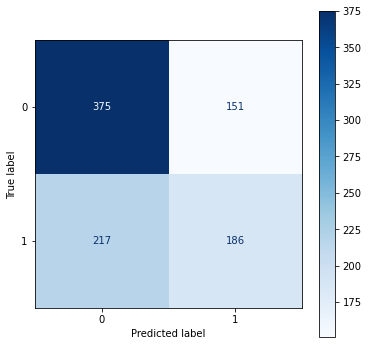

In [16]:
# Specifying figure size
fig, ax = plt.subplots(figsize=(6, 6)) 

# Generating confusion matrix
plot_confusion_matrix(grid_cv, test_X, test_y,
                      cmap = plt.cm.Blues,
                      values_format = '',
                      ax = ax);

**Estimating Prediction Probabilites**

In [17]:
# Getting prediction probabilites
prob = grid_cv.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for rejection and acceptance prob.
result[['Prob. of 0','Prob. of 1']] = pd.DataFrame(prob.tolist(), index = result.index)

# Saving dataframe as a csv file
#result.to_csv('Prediction Results.csv', index = False)

**Feature Importance**

In [18]:
# Storing importance values from the best fit model
importance = grid_cv.best_estimator_.feature_importances_

In [23]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

print(feature_imp.tail(50))

                         Feature  Importance
27    R_win_by_Decision_Majority    0.003901
28                  no_of_rounds    0.000000
29               avg_sub_att_dif    0.000000
30                   R_Reach_cms    0.000000
31                  R_Weight_lbs    0.000000
32                    title_bout    0.000000
33                    b_sub_odds    0.000000
34               lose_streak_dif    0.000000
35                win_streak_dif    0.000000
36                    r_sub_odds    0.000000
37                       win_dif    0.000000
38                  weight_class    0.000000
39          B_current_win_streak    0.000000
40          total_title_bout_dif    0.000000
41                        ko_dif    0.000000
42                      R_Stance    0.000000
43                    height_dif    0.000000
44         B_current_lose_streak    0.000000
45                       age_dif    0.000000
46                   better_rank    0.000000
47                   sig_str_dif    0.000000
48        

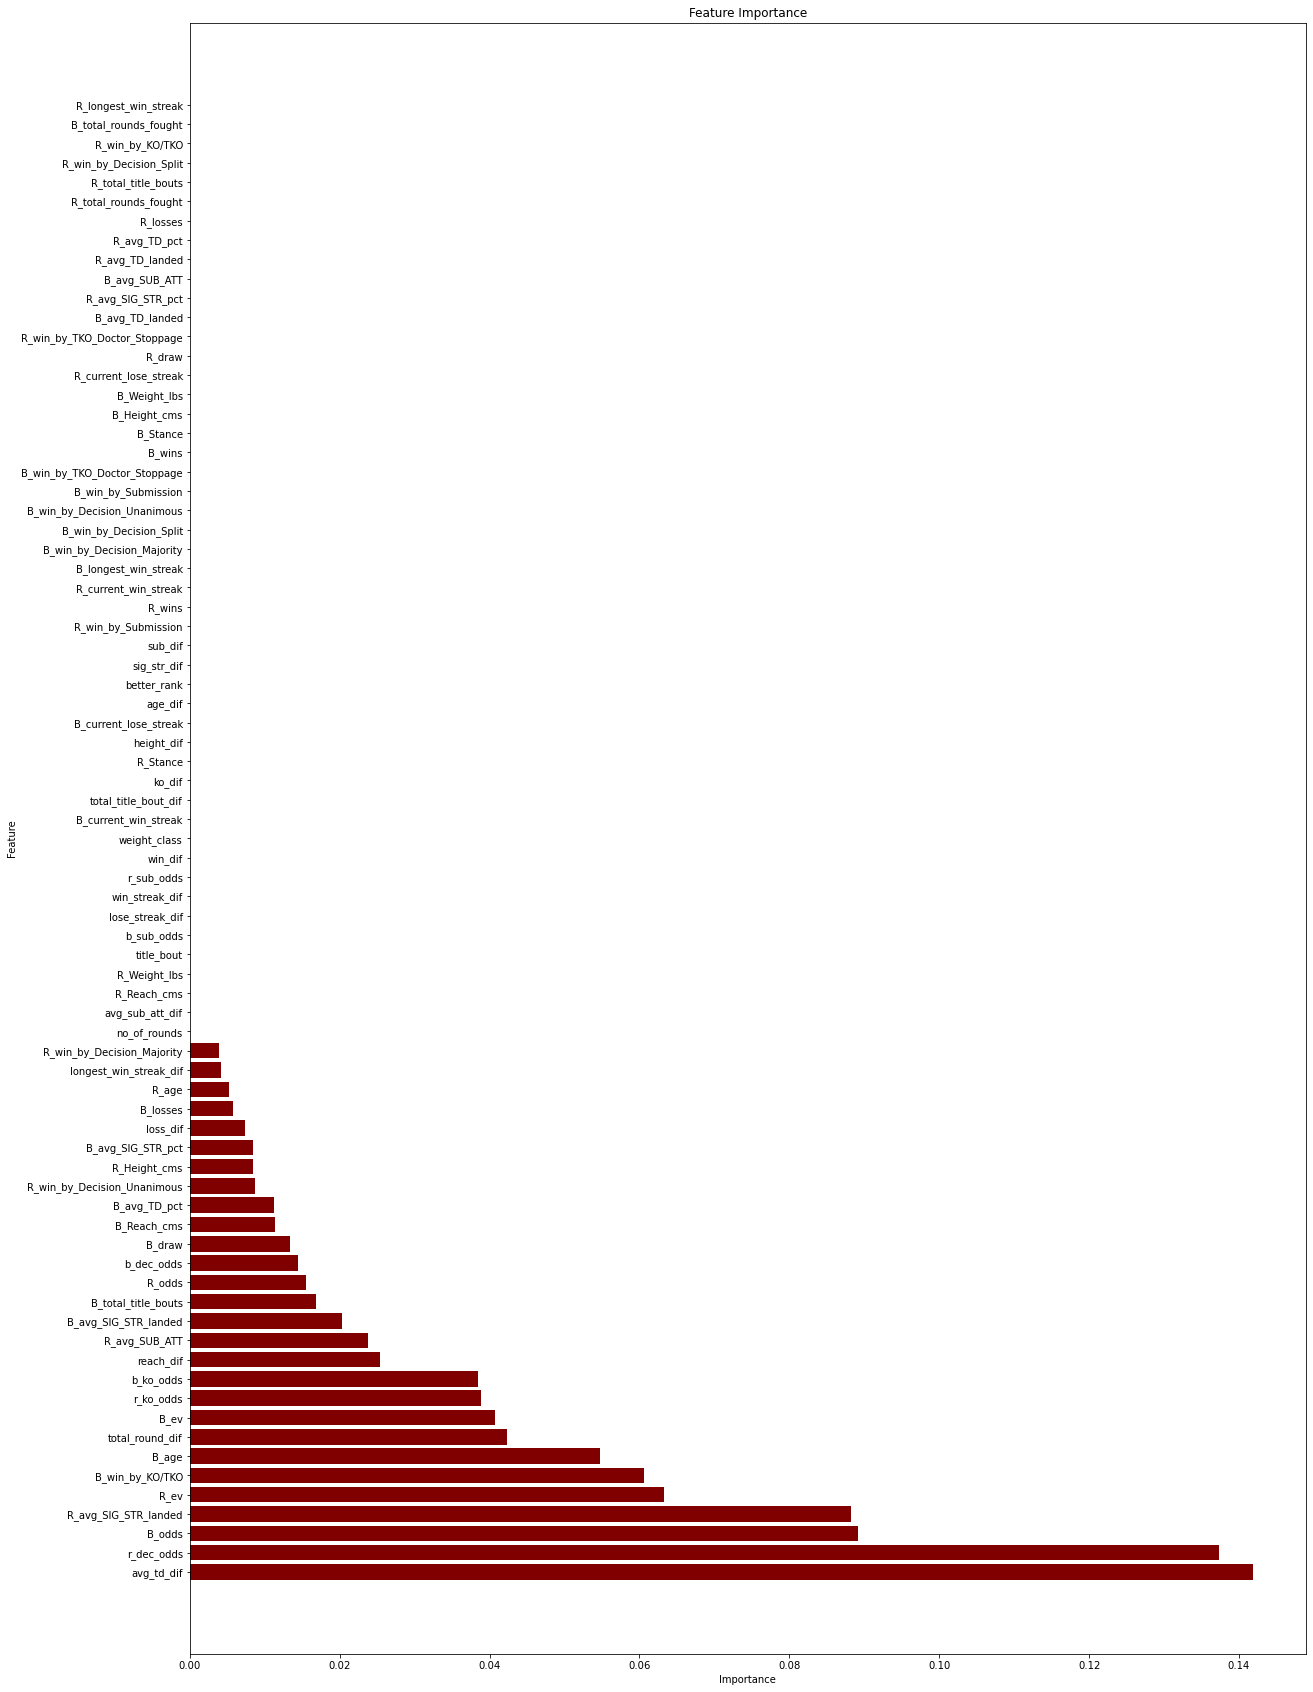

In [22]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
plt.savefig('ALLweightclasses_boosting_plot.png')